<a href="https://colab.research.google.com/github/Sathish2004/assignment/blob/main/sat_assign_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

/kaggle/input/covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx


In [ ]:
df = pd.read_excel('/kaggle/input/covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [ ]:
# Check if the patient IDs are repetative
df['PATIENT_VISIT_IDENTIFIER'].value_counts()

PATIENT_VISIT_IDENTIFIER
0      5
193    5
263    5
262    5
261    5
      ..
126    5
125    5
124    5
123    5
384    5
Name: count, Length: 385, dtype: int64

In [ ]:

df['WINDOW'].value_counts()

df['ICU'].value_counts()

ICU
0    1410
1     515
Name: count, dtype: int64

In [ ]:
##  Sample a patient ID to see the importatn features
id = 1
df[df['PATIENT_VISIT_IDENTIFIER'] == id]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.00000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.79798,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


In [ ]:
# How many patients are in ICU
len(df[df["ICU"] == 1]['PATIENT_VISIT_IDENTIFIER'].unique())

195

In [ ]:
# Groupby Patients in ICU and explore some general features
general_cols = ['PATIENT_VISIT_IDENTIFIER','DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3','DISEASE GROUPING 4','DISEASE GROUPING 5','DISEASE GROUPING 6']
icu_set = df[df['ICU'] == 1][general_cols].drop_duplicates(keep = 'first')
icu_set

,PATIENT_VISIT_IDENTIFIER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6
4,0,0.0,0.0,0.0,0.0,1.0,1.0
5,1,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.0,0.0,0.0,0.0,1.0,0.0
14,2,0.0,0.0,0.0,0.0,0.0,0.0
58,11,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1882,376,1.0,1.0,1.0,0.0,1.0,0.0
1895,379,0.0,0.0,0.0,0.0,0.0,0.0
1898,379,0.0,0.0,0.0,0.0,1.0,0.0
1904,380,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#from plotly.subplots import make_subplots
#import plotly.graph_objects as go
data1 = icu_set['PATIENT_VISIT_IDENTIFIER'].value_counts()
data2 = icu_set['DISEASE GROUPING 1'].value_counts()
data3 = icu_set['DISEASE GROUPING 2'].value_counts()
data4 = icu_set['DISEASE GROUPING 3'].value_counts()
data5 = icu_set['DISEASE GROUPING 4'].value_counts()
data6 = icu_set['DISEASE GROUPING 5'].value_counts()
data7 = icu_set['DISEASE GROUPING 6'].value_counts()
fig = make_subplots(rows=2, cols=7, subplot_titles=("PATIENT_VISIT_IDENTIFIER", "DISEASE GROUPING 1", "DISEASE GROUPING 2", "DISEASE GROUPING 3","DISEASE GROUPING 4","DISEASE GROUPING 5","DISEASE GROUPING 6"))

fig.add_trace(
    go.Bar(name = "PATIENT_VISIT_IDENTIFIER", x=data1.index, y = data1), row=1, col=1
)

fig.add_trace(
    go.Bar(name = 'DISEASE GROUPING 1', x=data2.index, y=data2),row=1, col=2
)

fig.add_trace(
    go.Bar(name ='DISEASE GROUPING 2',x=data3.index, y=data3),row=1, col=3
)

fig.add_trace(
    go.Bar(name = "DISEASE GROUPING 3", x=data4.index, y=data4),row=2, col=1,
)
fig.add_trace(
    go.Bar(name = "DISEASE GROUPING 4", x=data5.index, y=data5),row=2, col=2,
)
fig.add_trace(
    go.Bar(name = "DISEASE GROUPING 5", x=data6.index, y=data6),row=2, col=3,
)
fig.add_trace(
    go.Bar(name = "DISEASE GROUPING 6", x=data7.index, y=data7),row=2, col=4,
)

fig.update_xaxes(title_text="PATIENT_VISIT_IDENTIFIER", row=1, col=1)
fig.update_xaxes(title_text="DISEASE GROUPING 1", row=1, col=2)
fig.update_xaxes(title_text="DISEASE GROUPING 2", row=1, col=3)
fig.update_xaxes(title_text="DISEASE GROUPING 3", row=2, col=1)
fig.update_xaxes(title_text="DISEASE GROUPING 4", row=2, col=2)
fig.update_xaxes(title_text="DISEASE GROUPING 5", row=2, col=3)
fig.update_xaxes(title_text="DISEASE GROUPING 6", row=2, col=4)

fig.update_layout(height=900, width=1700,title_text="ICU Patients")
fig.show()

{}
{'facecolor': '#1f77b4', 'hatch': '/'}
{'facecolor': '#1f77b4', 'hatch': '/'}
v
{'facecolor': '#ff7f0e', 'hatch': '*'}
{'facecolor': '#ff7f0e', 'hatch': '*'}
v
{'facecolor': '#2ca02c', 'hatch': '+'}
{'facecolor': '#2ca02c', 'hatch': '+'}
v
{'facecolor': '#d62728', 'hatch': '|'}
{'facecolor': '#d62728', 'hatch': '|'}
v
{'edgecolor': 'w', 'orientation': 'h'}
{'facecolor': '#1f77b4'}
{'facecolor': '#1f77b4', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#ff7f0e'}
{'facecolor': '#ff7f0e', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#2ca02c'}
{'facecolor': '#2ca02c', 'edgecolor': 'w', 'orientation': 'h'}
h
{'facecolor': '#d62728'}
{'facecolor': '#d62728', 'edgecolor': 'w', 'orientation': 'h'}
h


Text(0, 0.5, 'x')

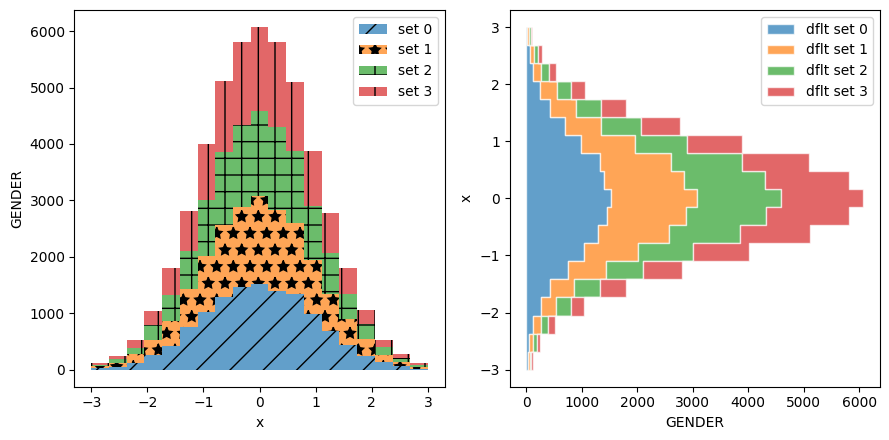

In [ ]:
from functools import partial
import itertools

from cycler import cycler

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mticker


def filled_hist(ax, edges, values, bottoms=None, orientation='v',
                **kwargs):
    print(orientation)
    if orientation not in 'hv':
        raise ValueError(f"orientation must be in {{'h', 'v'}} "
                         f"not {orientation}")

    kwargs.setdefault('step', 'post')
    kwargs.setdefault('alpha', 0.7)
    edges = np.asarray(edges)
    values = np.asarray(values)
    if len(edges) - 1 != len(values):
        raise ValueError(f'Must provide one more bin edge than value not: '
                         f'{len(edges)=} {len(values)=}')

    if bottoms is None:
        bottoms = 0
    bottoms = np.broadcast_to(bottoms, values.shape)

    values = np.append(values, values[-1])
    bottoms = np.append(bottoms, bottoms[-1])
    if orientation == 'h':
        return ax.fill_betweenx(edges, values, bottoms,
                                **kwargs)
    elif orientation == 'v':
        return ax.fill_between(edges, values, bottoms,
                               **kwargs)
    else:
        raise AssertionError("you should never be here")


def stack_hist(ax, stacked_data, sty_cycle, bottoms=None,
               hist_func=None, labels=None,
               plot_func=None, plot_kwargs=None):
    # deal with default binning function
    if hist_func is None:
        hist_func = np.histogram

    # deal with default plotting function
    if plot_func is None:
        plot_func = filled_hist

    # deal with default
    if plot_kwargs is None:
        plot_kwargs = {}
    print(plot_kwargs)
    try:
        l_keys = stacked_data.keys()
        label_data = True
        if labels is None:
            labels = l_keys

    except AttributeError:
        label_data = False
        if labels is None:
            labels = itertools.repeat(None)

    if label_data:
        loop_iter = enumerate((stacked_data[lab], lab, s)
                              for lab, s in zip(labels, sty_cycle))
    else:
        loop_iter = enumerate(zip(stacked_data, labels, sty_cycle))

    arts = {}
    for j, (data, label, sty) in loop_iter:
        if label is None:
            label = f'dflt set {j}'
        label = sty.pop('label', label)
        vals, edges = hist_func(data)
        if bottoms is None:
            bottoms = np.zeros_like(vals)
        top = bottoms + vals
        print(sty)
        sty.update(plot_kwargs)
        print(sty)
        ret = plot_func(ax, edges, top, bottoms=bottoms,
                        label=label, **sty)
        bottoms = top
        arts[label] = ret
    ax.legend(fontsize=10)
    return arts


# set up histogram function to fixed bins
edges = np.linspace(-3, 3, 20, endpoint=True)
hist_func = partial(np.histogram, bins=edges)

# set up style cycles
color_cycle = cycler(facecolor=plt.rcParams['axes.prop_cycle'][:4])
label_cycle = cycler(label=[f'set {n}' for n in range(4)])
hatch_cycle = cycler(hatch=['/', '*', '+', '|'])

# Fixing random state for reproducibility
np.random.seed(19680801)

stack_data = np.random.randn(4, 12250)
dict_data = dict(zip((c['label'] for c in label_cycle), stack_data))
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
arts = stack_hist(ax1, stack_data, color_cycle + label_cycle + hatch_cycle,
                  hist_func=hist_func)

arts = stack_hist(ax2, stack_data, color_cycle,
                  hist_func=hist_func,
                  plot_kwargs=dict(edgecolor='w', orientation='h'))
ax1.set_ylabel('GENDER')
ax1.set_xlabel('x')
ax2.set_xlabel('GENDER')
ax2.set_ylabel('x')

In [ ]:
window_set = df[['WINDOW', 'ICU']]
window_set = window_set[window_set['ICU'] == 1]

In [ ]:
import plotly.express as px
data = window_set.groupby("ICU").sum()
fig = px.bar(data, title="Patient Admited time window and ICU Joining")
fig.show()

In [ ]:
icu_patients = icu_set['PATIENT_VISIT_IDENTIFIER'].unique()
# filter out the data that has ICU as 0 (Training data prepration)
model_data = df[df['ICU'] == 0]
model_data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,6-12,0
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0


In [ ]:
## Add a column that is sum of missing value row wise.
model_data['Missingness'] = model_data.isnull().sum(axis = 1)
model_data.head()

/tmp/ipykernel_20/627119415.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Missingness
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0,180
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0,180
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0,36
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,6-12,0,204
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0,36


In [ ]:

model_data['ICU_Admitted'] = np.where(model_data['PATIENT_VISIT_IDENTIFIER'].isin(icu_patients), 1 , 0)

/tmp/ipykernel_20/2001230229.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
model_data[model_data["ICU_Admitted"] == 1]


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Missingness,ICU_Admitted
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0,180,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0,180,1
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0,36,1
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,-1.0,-1.0,6-12,0,204,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,380,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6-12,0,180,1
1910,382,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0,36,1
1911,382,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0,180,1
1912,382,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0,36,1


In [ ]:
# Remove ICU Column from this set.
model_data.drop('ICU', axis = 'columns', inplace = True)
model_data

/tmp/ipykernel_20/3812626759.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,Missingness,ICU_Admitted
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,180,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,180,1
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,36,1
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,204,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,180,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,180,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,180,0


In [ ]:
## Are there any constant value columns
const_columns = list(model_data.columns[model_data.nunique() <= 1])
const_columns

['ALBUMIN_DIFF',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_DIFF',
 'BLAST_DIFF',
 'CALCIUM_DIFF',
 'CREATININ_DIFF',
 'FFA_DIFF',
 'GGT_DIFF',
 'GLUCOSE_DIFF',
 'HEMATOCRITE_DIFF',
 'HEMOGLOBIN_DIFF',
 'INR_DIFF',
 'LACTATE_DIFF',
 'LEUKOCYTES_DIFF',
 'LINFOCITOS_DIFF',
 'NEUTROPHILES_DIFF',
 'P02_ARTERIAL_DIFF',
 'P02_VENOUS_DIFF',
 'PC02_ARTERIAL_DIFF',
 'PC02_VENOUS_DIFF',
 'PCR_DIFF',
 'PH_ARTERIAL_DIFF',
 'PH_VENOUS_DIFF',
 'PLATELETS_DIFF',
 'POTASSIUM_DIFF',
 'SAT02_ARTERIAL_DIFF',
 'SAT02_VENOUS_DIFF',
 'SODIUM_DIFF',
 'TGO_DIFF',
 'TGP_DIFF',
 'TTPA_DIFF',
 'UREA_DIFF',
 'DIMER_DIFF']

In [ ]:
# Remove these constant value columns from the set
model_data.drop(const_columns, axis = 'columns', inplace = True)
model_data

/tmp/ipykernel_20/3625871211.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,Missingness,ICU_Admitted
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,180,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,180,1
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,36,1
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,204,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,180,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,180,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,180,0


In [ ]:
# Patient ID 199 seems not having data , decided to remove this from the set
model_data = model_data[model_data['PATIENT_VISIT_IDENTIFIER'] != 199]

In [ ]:
print(model_data.isna().sum()[model_data.isna().sum() > 0])

ALBUMIN_MEDIAN                     872
ALBUMIN_MEAN                       872
ALBUMIN_MIN                        872
ALBUMIN_MAX                        872
BE_ARTERIAL_MEDIAN                 872
                                  ... 
BLOODPRESSURE_SISTOLIC_DIFF_REL    627
HEART_RATE_DIFF_REL                620
RESPIRATORY_RATE_DIFF_REL          675
TEMPERATURE_DIFF_REL               626
OXYGEN_SATURATION_DIFF_REL         617
Length: 180, dtype: int64


In [ ]:
model_data = model_data.sort_values(by=['PATIENT_VISIT_IDENTIFIER', 'WINDOW'])\
    .groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)\
    .fillna(method='ffill')\
    .fillna(method='bfill')

In [ ]:
model_data.isna().sum().sum()

0

In [ ]:
model_data.dtypes

AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
DISEASE GROUPING 2            float64
                               ...   
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
Missingness                     int64
ICU_Admitted                    int64
Length: 195, dtype: object

In [ ]:
# Convert WINDOW, AGE_PERCETIL  columns categorical
model_data['AGE_PERCENTIL'] = model_data['AGE_PERCENTIL'].astype("category")
model_data['WINDOW'] = model_data['WINDOW'].astype("category")

In [ ]:
#Create windows dummies dataframe
window_dummy = pd.get_dummies(model_data['WINDOW'])
#concat this to main dataframe
model_data = pd.concat([model_data, window_dummy], axis =1)
# Remove the WINDOW column
model_data = model_data.drop(columns=['WINDOW'])
#create AGE_PERCENTIL dummy dataframe
AGE_PERCENTIL_dummy = pd.get_dummies(model_data['AGE_PERCENTIL'])
#concat this to main dataframe
model_data = pd.concat([model_data, AGE_PERCENTIL_dummy], axis =1)
# Remove the AGE_PERCENTIL column
model_data = model_data.drop(columns=['AGE_PERCENTIL'])
model_data

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,...,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
2,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
3,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1921,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1922,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1923,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
#Independent Vector
#All columns Except the 'ICU_Admitted' get an array of this
X = model_data.drop('ICU_Admitted', axis = 'columns', inplace = False).values
#Dependent Vector Target column values as an array
y = model_data['ICU_Admitted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y)

In [ ]:
# Import xgboost classifier
from xgboost import XGBClassifier
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.48%
